In [3]:
import sys, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random


from psychopy import (
    visual,
    core,
    event,
    gui,
    data,
)  # Perhaps faster to import modules individually?

import numpy as np
import random
import yaml
import math
import pandas as pd
from datetime import datetime
import os
import sys
import time


Fontconfig warning: ignoring UTF-8: not a valid region tag


In [53]:
!{sys.executable} -m pip install colour-science

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.4 MB/s eta 0:00:00


[0.42138981289534633,
 0.43435349989459365,
 0.46201573808900692,
 0.47962339539526205,
 0.49369707181518002,
 0.51325454769203438,
 0.53010725800900016,
 0.55771660890640085,
 0.61476808977142994,
 0.63846906593789343]

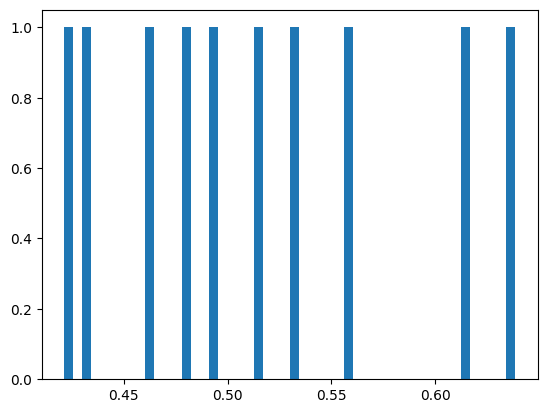

In [128]:
def bellshape_sample(mean, sd, n_samples, plot:bool=False, shuffle:bool=True):
    
    sample_pool = np.array([random.normalvariate(mean, sd) for sample in range(n_samples)])
    
    if shuffle:
        random.shuffle(sample_pool)
    else:
        sample_pool.sort()
    if plot:
        plt.hist(sample_pool, bins=50)
    
    return list(sample_pool)


# ball_start_colors = bellshape_sample(float(config["ball_start_color_mean"]), float(config["ball_start_color_sd"]), n_trials)

ui = bellshape_sample(0.5, 0.1, 10, plot=True, shuffle=False)

ui

In [131]:
# short lambda function to turn range 0 to 1 into range of -1 to 1
norm = lambda x: (x * 2) - 1
invnorm = lambda x: (x + 1) / 2

norm(.175)

-0.65

In [133]:
ball_color_change_mean: .5 # used to be 0
ball_color_change_sd: .58375 # Used to be .1675

ball_start_color_mean: .575 # Used to be .15
ball_start_color_sd: .5875 # Used to be .175


.1675/2

0.08375

In [56]:
import numpy as np
import colour

def oklab_to_cielab(oklab_color):
    xyz_color = colour.Oklab_to_XYZ(oklab_color)
    cielab_color = colour.XYZ_to_Lab(xyz_color)
    return cielab_color

In [1]:
def lab_to_rgb(L, a, b):
    lab = np.array([[[L, a, b]]], dtype=np.float32)
    rgb = color.lab2rgb(lab)
    # Scale to 0-255 range and return as integer values
    rgb_255 = np.clip(rgb[0][0] * 255, 0, 255).astype(int)
    return rgb_255

In [61]:
# import psychopy.tools.colorspacetools as cst
# cielabColor = (53.0, -20.0, 0.0)  # greenish color (L*, a*, b*)
# rgbColor = cst.cielab2rgb(cielabColor)

# rgbColor


oklab_to_cielab([1, 0.0, 0.0])

array([  1.00000001e+02,   2.47053015e-03,   4.63858473e-02])

In [151]:
colour_steps = np.linspace(0, 1, 10)






rgb_colors = [[luminance, luminance, luminance] for luminance in colour_steps]


cielab_colors = [[int(luminance * 100), 0, 0] for luminance in colour_steps]

oklab_colors = [((lab_to_rgb(oklab_to_cielab([luminance, 0, 0])) + 1) / 2) for luminance in colour_steps]

oklab_colors

cielab_rgb_colors = [np.clip(((cst.cielab2rgb(cielab) + 1) / 2), 0, 1) for cielab in cielab_colors]
# cielab_rgb_colors


In [153]:
import numpy as np
import colour

def oklab_to_cielab(oklab):
    # Convert OKLab to XYZ
    xyz = colour.Oklab_to_XYZ(oklab)
    # Convert XYZ to CIELAB
    cielab = colour.XYZ_to_Lab(xyz)
    return cielab

def lab_to_rgb(lab):
    # Convert CIELAB to XYZ
    xyz = colour.Lab_to_XYZ(lab)
    # Convert XYZ to RGB
    rgb = colour.XYZ_to_sRGB(xyz)
    return rgb

def oklab_to_linear_srgb(c):
    l_ = c[0] + 0.3963377774 * c[1] + 0.2158037573 * c[2]
    m_ = c[0] - 0.1055613458 * c[1] - 0.0638541728 * c[2]
    s_ = c[0] - 0.0894841775 * c[1] - 1.2914855480 * c[2]

    l = l_ ** 3
    m = m_ ** 3
    s = s_ ** 3

    return np.array([
        +4.0767416621 * l - 3.3077115913 * m + 0.2309699292 * s,
        -1.2684380046 * l + 2.6097574011 * m - 0.3413193965 * s,
        -0.0041960863 * l - 0.7034186147 * m + 1.7076147010 * s,
    ])


# Compound function to be used in psychopy (make sure this is also usable in other projects, as quite important)
def oklab_to_rgb(oklab, psychopy_rgb:bool=False):
    # Convert OKLab to XYZ
    xyz = colour.Oklab_to_XYZ(oklab)
    # Convert XYZ to RGB
    rgb = [np.clip(((rgb_idx * 2) - 1), -1, 1) for rgb_idx in colour.XYZ_to_sRGB(xyz)] if psychopy_rgb else colour.XYZ_to_sRGB(xyz)

    return rgb


# Example usage
c = [0.5, 0.1, 0.2]  # Example OKLab color
linear_srgb = oklab_to_linear_srgb(c)
print(linear_srgb)

# Example usage
colour_steps = np.linspace(0, 1, 10)  # Example luminance steps

oklab_colors = [lab_to_rgb(oklab_to_cielab([luminance, 0, 0])) for luminance in colour_steps]
oklab_colors_alt = [oklab_to_linear_srgb([luminance, 0, 0]) for luminance in colour_steps]
oklab_colors_alt_alt = [oklab_to_rgb([luminance, 0, 0], False) for luminance in colour_steps]
# Normalize RGB values to [0, 1] range
# oklab_colors = [(rgb + 1) / 2 for rgb in oklab_colors]

print(oklab_colors)

[ 0.45163386  0.02727252 -0.05548469]
[array([ 0.,  0.,  0.]), array([ 0.01772763,  0.01772387,  0.01771005]), array([ 0.10598487,  0.10597062,  0.10591832]), array([ 0.21223857,  0.2122149 ,  0.21212809]), array([ 0.32788871,  0.3278548 ,  0.32773042]), array([ 0.45106941,  0.45102458,  0.45086018]), array([ 0.58060403,  0.58054773,  0.58034125]), array([ 0.71567297,  0.71560471,  0.71535435]), array([ 0.85566797,  0.85558731,  0.85529147]), array([ 1.00011723,  1.00002378,  0.99968101])]


In [120]:
oklab_colors_alt_alt

[array([ 0.,  0.,  0.]),
 array([ 0.01772763,  0.01772387,  0.01771005]),
 array([ 0.10598487,  0.10597062,  0.10591832]),
 array([ 0.21223857,  0.2122149 ,  0.21212809]),
 array([ 0.32788871,  0.3278548 ,  0.32773042]),
 array([ 0.45106941,  0.45102458,  0.45086018]),
 array([ 0.58060403,  0.58054773,  0.58034125]),
 array([ 0.71567297,  0.71560471,  0.71535435]),
 array([ 0.85566797,  0.85558731,  0.85529147]),
 array([ 1.00011723,  1.00002378,  0.99968101])]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.00011722671].


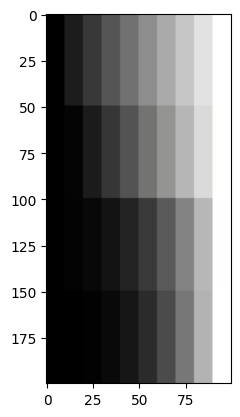

In [154]:
# block = np.ones((100, 100, 3), dtype=np.uint8) * ((rgbColor + 1) / 2)
dims = 100
block = np.ones((dims + 100, dims, 3))

col_no = 10
for col in range(col_no):
    block[100:150, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = cielab_rgb_colors[col]
    block[50:100, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = oklab_colors[col]
    block[:50, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = rgb_colors[col]
    # block[100:150, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = oklab_colors_alt_alt[col]
    block[150:, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = oklab_colors_alt[col]
plt.imshow(block)

# block[:, :50, :] = rgb_colors[4]
# block[:, 50:, :] = cielab_rgb_colors[4]
# plt.imshow(block)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.00011722671].


(-0.5, 99.5, 99.5, -0.5)

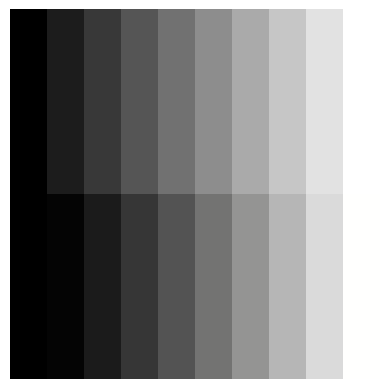

In [135]:
dims = 100
block = np.ones((dims, dims, 3))

col_no = 10
for col in range(col_no):

    block[:50, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = rgb_colors[col]
    block[50:, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = oklab_colors_alt_alt[col]
plt.imshow(block)

plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.00011722671].


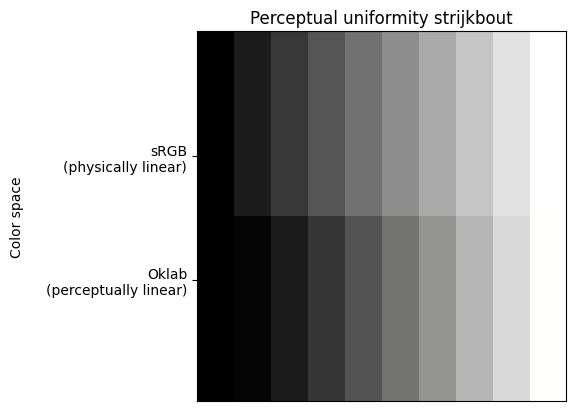

In [193]:
import numpy as np
import matplotlib.pyplot as plt

steps = 10

colour_steps = np.linspace(0, 1, steps)
rgb_colors = [[luminance, luminance, luminance] for luminance in colour_steps]
oklab_colors_alt_alt = [oklab_to_rgb([luminance, 0, 0], False) for luminance in colour_steps]

dims = 100
block = np.ones((dims, dims, 3))

col_no = steps
for col in range(col_no):
    block[:50, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = rgb_colors[col]
    block[50:, int(col * dims / col_no):int((col + 1) * dims / col_no), :] = oklab_colors_alt_alt[col]

plt.imshow(block)
# plt.axis("off")

# Add title
plt.title("Perceptual uniformity strijkbout")

# Add y-axis ticks and labels
# plt.yticks([dims / 3, dims/2,2 * dims / 3], ["sRGB\n(non-linear)", "Color space:                     ", "Oklab\n(linear)",])
plt.yticks([dims / 3, 2 * dims / 3], ["sRGB\n(physically linear)", "Oklab\n(perceptually linear)",])
plt.gca().xaxis.set_visible(False)

# Add x-axis label
# plt.xlabel("Color space")
plt.ylabel("Color space\n")

plt.show()

(256, 256, 3)


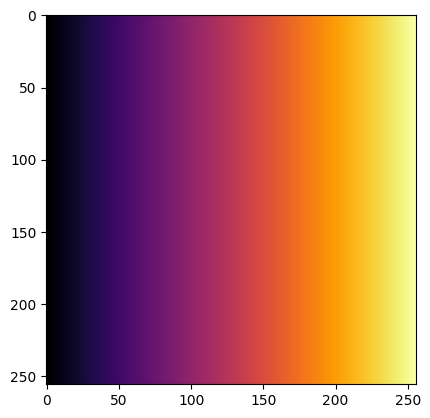

In [103]:
# import the matplotlib colourmaps
import matplotlib.cm as cm
# Get a list of the inferno colourmap colours
# inferno = cm.get_cmap('inferno', 10)
# inferno = cm["inferno"]
inferno = plt.colormaps["inferno"]

# Get a list of the colours in the inferno colourmap
colors = np.array(inferno.colors)

# Turn the 256,3 into a square with 3 colour dimensions being 256x256x3
colors_3d = np.repeat(colors[np.newaxis, :, :], 256, axis=0)

print(colors_3d.shape)

plt.imshow(colors_3d)

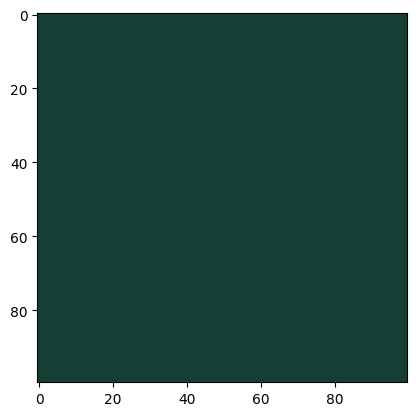

In [13]:
# block = np.ones((100, 100, 3), dtype=np.uint8) * ((rgbColor + 1) / 2)
block = np.ones((100, 100, 3))
block[:, :50, :] = ((rgbColor + 1) / 2)
block[:, 50:, :] = ((rgbColor + 1) / 2)
plt.imshow(block)

In [2]:
rgbtest = lab_to_rgb(50, 0, 0)

NameError: name 'np' is not defined

In [22]:
# background_colors_lab = [([i, i, i]) for i in range(-1, 1, 10)]

# background_colors_lab



vals = np.round(np.linspace(-1, 1, 9), 2)

lab = [([val, val, val]) for val in vals]

lab

[[-1.0, -1.0, -1.0],
 [-0.75, -0.75, -0.75],
 [-0.5, -0.5, -0.5],
 [-0.25, -0.25, -0.25],
 [0.0, 0.0, 0.0],
 [0.25, 0.25, 0.25],
 [0.5, 0.5, 0.5],
 [0.75, 0.75, 0.75],
 [1.0, 1.0, 1.0]]

In [3]:
sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders



from functions.physics import get_bounce_dist

# Load configuration from YAML file
config_path = os.path.join("/Users/wiegerscheurer/repos/physicspred/", "config_lumin.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)

occluder_type = config["occluder_type"]  # "square" or "cross"
# Access parameters from the config dictionary
win_dims = config['win_dims']
# ball_speed = config['ball_speed']
ball_radius = config["ball_radius"]
interactor_height = config["interactor_height"]
interactor_width = config["interactor_width"]
occluder_radius = config["occluder_radius"]
verbose = config["verbose"]
exp_parameters = config["exp_parameters"]
square_size = config["square_size"]
occluder_opacity = config["occluder_opacity"]

exp_data = {par: [] for par in exp_parameters}

win = visual.Window(
    size=win_dims,        # The size of the window in pixels (width, height).
    # fullscr=config["full_screen"],  # Whether to run in full-screen mode. Overrides size arg
    fullscr=False,
    screen=config["experiment_screen"],  # The screen number to display the window on (0 is usually the primary screen).
    winType="pyglet",  # The backend to use for the window (e.g., 'pyglet', 'pygame').
    allowStencil=False,  # Whether to allow stencil buffer (used for advanced graphics).
    # monitor='testMonitor',    # The name of the monitor configuration to use (defined in the Monitor Center).
    color=[-.25, -.25, -.25],  # [0, 0, 0],          # The background color of the window (in RGB space).
    colorSpace="rgb",  # The color space for the background color (e.g., 'rgb', 'dkl', 'lms').
    backgroundImage="",  # Path to an image file to use as the background.
    backgroundFit="none",  # How to fit the background image ('none', 'fit', 'stretch').
    blendMode="avg",  # The blend mode for drawing (e.g., 'avg', 'add').
    useFBO=True,  # Whether to use Frame Buffer Objects (for advanced graphics).
    units="pix",  # The default units for window operations (e.g., 'pix', 'norm', 'cm', 'deg', 'height').
)

AttributeError: ObjCInstance b'NSConcreteNotification' has no attribute b'type'

In [4]:
# For monitor-calibrated luminance (ideal)
from psychopy import tools
target_lum = tools.monitorunpack.MonitorGamma(win.monitor).reverse([-.25, -.25, -.25])

# For approximate calculations without photometer
Y = 0.2126*R + 0.7152*G + 0.0722*B  # Standard luminance formula


AttributeError: module 'psychopy.tools' has no attribute 'monitorunpack'

: 